In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator


In [73]:
import numpy as np

img = load_img('2.jpg', target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 224, 224, 3)

datagen = ImageDataGenerator(rescale=1./255)

generator = datagen.flow(img_array)


In [66]:

rescaled_image = next(generator)[0]  # shape: (128, 128, 3)

rescaled_image.shape


(128, 128, 3)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


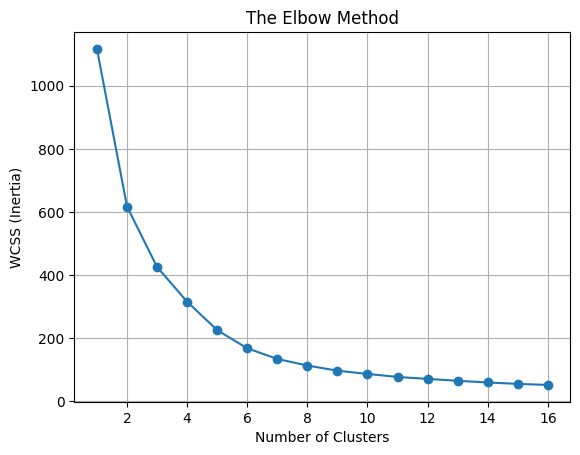

In [67]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Flatten image from (224, 224, 3) to (224*224, 3)
pixel_data = rescaled_image.reshape((-1, 3))

# Step 2: Apply Elbow Method to find optimal clusters
wcss = []
for i in range(1, 17):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=20,
        algorithm='elkan',
        tol=0.001,
        random_state=42
    )
    kmeans.fit(pixel_data)
    wcss.append(kmeans.inertia_)

# Step 3: Plot the Elbow curve
plt.plot(range(1, 17), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


In [68]:
pixel_data = rescaled_image.reshape((-1, 3))

pixel_data.shape

(16384, 3)

In [69]:
rescaled_image.shape

(128, 128, 3)

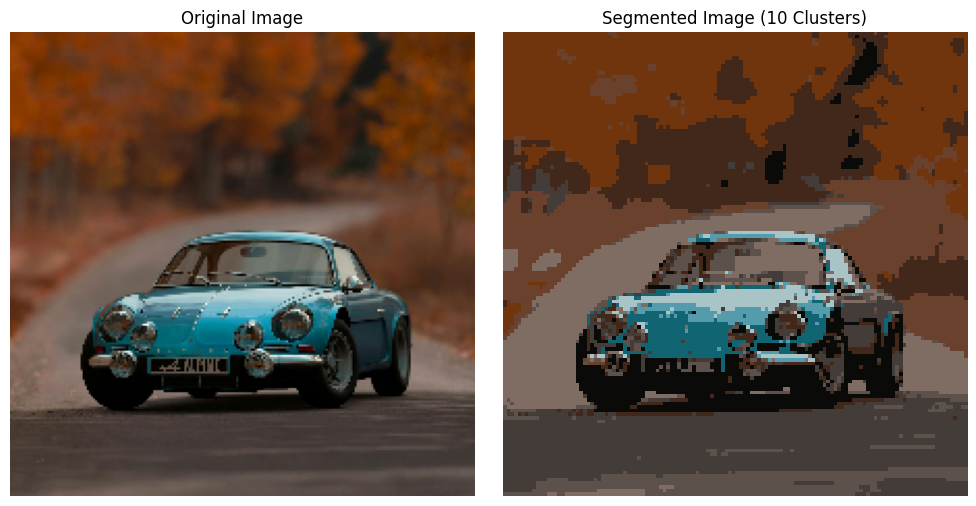

In [ ]:

km = KMeans(n_clusters=10, random_state=42)
labels = km.fit_predict(pixel_data)           
centroids = km.cluster_centers_               

# Reconstruct the segmented image
segmented_img = centroids[labels]       
segmented_img = segmented_img.reshape((128,128, 3)) 

# Plot original and segmented images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

# Segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title("Segmented Image (10 Clusters)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [81]:
import joblib
joblib.dump(km, 'kmeans_model.pkl')

['kmeans_model.pkl']